# Support Vector Machines (SVM)

Support Vector Machine (SVM) is a supervised machine learning algorithm mainly used for classification but can also be used for regression. In SVM just like logistic regression, we try to find the **optimal hyperplane** which separated the positive and negative examples. But unlike it we select two **margin hyperplanes** parallel to the main hyperplane on both sides and passing through one or more of the nearest positive or negative points such that the distance between them is maximized. They separated by a distance called **marginal distance**. The points which pass through the margin hyperplanes are called **support vectors**.

<img src = './images/SVM.png' style = 'width:500px;height:500px;'>

**Linear SVM**<br/>
In Linear SVM the data points are Linearly seprable just like the in the picture shown above.

**Hard Margin** - If we select the hyperplanes such that no data points should fall inside the margin then it is Hard Margin. Our model will be more prone to overfitting in this case.

**Soft Margin** - If we allow a few points which are not linearly separable to fall inside the margin then it is Soft Margin. This is more of a real life scenario and a better fit for new upcoming test data.

<img src = './images/hard_vs_soft_margin.png'>

**Non-Linear Classification**<br/>
For non-linearlly separable data also we can SVM. SVM uses a technique called **kernel** for this, which transforms the data from a lower dimension to a higher dimension. There are various types of kernels like **Linear, Polynomial, RBF (Radial Basis Function), etc**.
<img src = './images/SVM_kernel.jpg' style = 'width:800px;height:400px;'>

In this notebook we will perform Linear classification with SVM.

In [1]:
# import the required libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Initialize the paramaters
Initialize the weights and biases to 0.

In [2]:
def initializeParams(dim):
    w = np.zeros((1, dim))
    b = 0
    return w, b

## Linear Model

For our main and marginal hyperplanes, we have
$$w.x - b = 0$$
$$w.x_i - b >= 1\text{, if y_i = 1}$$
$$w.x_i - b <= -1\text{, if y_i = -1}$$
Therefore, 
$$y_i(w.x_i - b) >= 1$$

In [3]:
 def forwardProp(w, b, X_i):
    Z = np.dot(w, X_i) - b
    return Z

## Cost function

We will use hinge loss function 
$$ J = max(0, 1 - y_i(w.x_i - b)) $$

Add regularization term
$$ J = \lambda ||w||^2 + \frac{1}{m}\sum_{i = 1}^{m} max(0, 1 - y_i(w.x_i - b)) $$

In [4]:
def cost(Y, Z, w, b, lambda_param):
    m = Y.shape[0]
    return lambda_param * np.linalg.norm(w) + 1 / m * np.sum(np.maximum(0, 1 - np.dot(Y, Z)))

## Backward propagation
If **y_i.f(x) >= 1**
$$ \frac{dZ}{dw} = 2 \lambda w$$
$$ \frac{dJ}{db} = 0 $$
else
$$ \frac{dZ}{dw} = 2 \lambda w - y_i.x_i$$
$$ \frac{dJ}{db} = y_i $$

In [5]:
def backprop(X_i, Y_i, lambda_param, w, condition):
    if condition == True:
        dw = 2 * lambda_param * w 
        db = 0
    else:
        dw = 2 * lambda_param * w - np.dot(X_i, Y_i.item())
        db = Y_i
    return (dw, db)

## Update Parameters
Update the parameters using Gradient Descent.

In [6]:
def updateParams(w, b, dw, db, alpha):
    w = w - alpha * dw
    b = b - alpha * db
    return (w, b)

Combine all the steps and functions to form a model.

In [7]:
def model(X, Y, max_iters = 1000, alpha = 0.001, lambda_param = 0.01):
    w, b = initializeParams(X.shape[1])
    
    for iters in range(max_iters):
        for idx, X_i in enumerate(X):
            Z = forwardProp(w, b, X_i)
            
            condition = (Y[idx] * Z) >= 1
            
            c = cost(Y, Z, w, b, lambda_param)
            
            (dw, db) = backprop(X_i, Y[idx], lambda_param, w, condition)
            
            (w, b) = updateParams(w, b, dw, db, alpha)
        
        if iters % 20 == 0:
            print('Iteration {} \nCurrent cost: '.format(iters), round(c, 3))

    params = {'w': w, 'b': b}
    
    return params

In [8]:
# functions to visualize our results
def get_hyperplane_value(x, w, b, offset):
    return (-w[0][0] * x + b + offset) / w[0][1]

def visualize_svm(X, y, params):
    w = params['w']
    b = params['b']
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], c = y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

In [9]:
def predict(params, X):
    approx = np.dot(params['w'], X.T) - params['b']
    return np.sign(approx)

## Generating the data

In [10]:
x, y = make_blobs(n_samples = 500, n_features = 2, centers = 2, cluster_std = 1.2)
y = np.where(y == 0, -1, 1)
y = y.reshape(-1, 1)

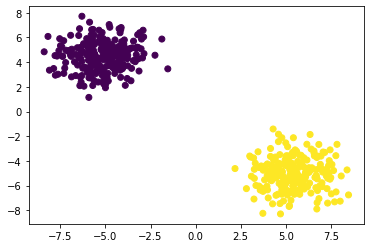

In [11]:
plt.scatter(x[:,0], x[:,1], c = y);

In [12]:
# Use the model to generate the appropriate paremeters
params = model(x, y, 1000)

Iteration 0 
Current cost:  1.468
Iteration 20 
Current cost:  1.601
Iteration 40 
Current cost:  1.629
Iteration 60 
Current cost:  1.622
Iteration 80 
Current cost:  1.617
Iteration 100 
Current cost:  1.61
Iteration 120 
Current cost:  1.607
Iteration 140 
Current cost:  1.617
Iteration 160 
Current cost:  1.611
Iteration 180 
Current cost:  1.607
Iteration 200 
Current cost:  1.604
Iteration 220 
Current cost:  1.6
Iteration 240 
Current cost:  1.597
Iteration 260 
Current cost:  1.594
Iteration 280 
Current cost:  1.591
Iteration 300 
Current cost:  1.589
Iteration 320 
Current cost:  1.604
Iteration 340 
Current cost:  1.601
Iteration 360 
Current cost:  1.598
Iteration 380 
Current cost:  1.596
Iteration 400 
Current cost:  1.593
Iteration 420 
Current cost:  1.591
Iteration 440 
Current cost:  1.591
Iteration 460 
Current cost:  1.589
Iteration 480 
Current cost:  1.587
Iteration 500 
Current cost:  1.587
Iteration 520 
Current cost:  1.585
Iteration 540 
Current cost:  1.586
I

## Generate the predicted output for the input

In [13]:
Y_pred = predict(params, x).T 

In [14]:
print("Accuracy: {} %".format(100 - np.mean(np.abs(Y_pred - y)) * 100))

Accuracy: 100.0 %


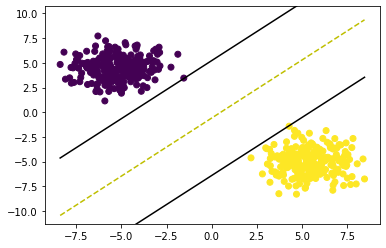

In [15]:
visualize_svm(x, y, params)